In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [8]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])


In [9]:
# Print the model summary

# model.weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [45]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=( 28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax'),
])


In [46]:
# Print the model summary

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [47]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc, mae])


In [48]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f56c13c4cf8>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f56c13c44e0>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [49]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [50]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [51]:
# Print the shape of the training data



# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [52]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [53]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255
test_images = test_images / 255

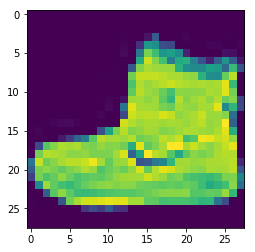

label: Ankle boot


In [54]:
# Display one of the images

i = 0 
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [56]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 52s - loss: 0.4030 - sparse_categorical_accuracy: 0.8583 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 50s - loss: 0.3545 - sparse_categorical_accuracy: 0.8754 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 50s - loss: 0.3304 - sparse_categorical_accuracy: 0.8829 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 49s - loss: 0.3169 - sparse_categorical_accuracy: 0.8875 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 48s - loss: 0.3043 - sparse_categorical_accuracy: 0.8917 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 49s - loss: 0.2943 - sparse_categorical_accuracy: 0.8947 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 49s - loss: 0.2898 - sparse_categorical_accuracy: 0.8957 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 49s - loss: 0.2833 - sparse_categorical_accuracy: 0.8990 - mean_absolute_error: 4.4200


#### Plot training history

In [57]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.402993,0.858333,4.420000
1,0.354503,0.875367,4.420000
2,0.330377,0.882900,4.420000
3,0.316935,0.887533,4.420000
4,0.304350,0.891650,4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

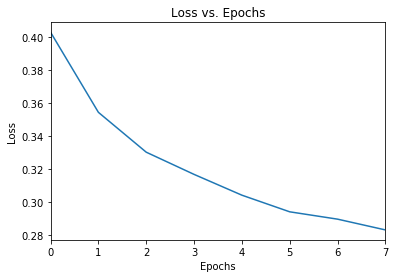

In [58]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

<function matplotlib.pyplot.show(*args, **kw)>

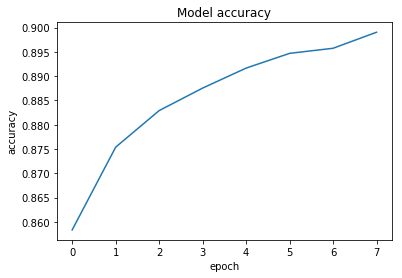

In [60]:
# Make a plot for the accuracy

acc_plot = plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

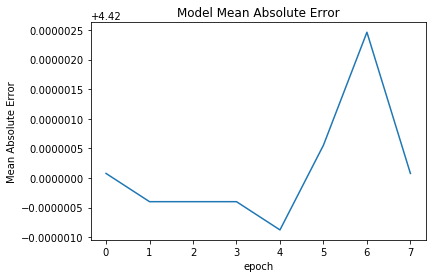

In [61]:
# Make a plot for the additional metric

acc_plot = plt.plot(history.history['mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.show

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [59]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [62]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 6s - loss: 0.3292 - sparse_categorical_accuracy: 0.8857 - mean_absolute_error: 4.4200


#### Make predictions from the model

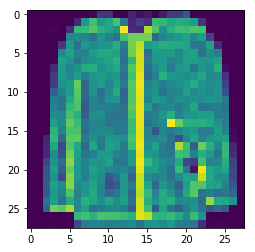

Label: Coat


In [63]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [64]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: Shirt
